In [1]:
from wavelet1d import *
from scipy.integrate import quad

# Scaling Function

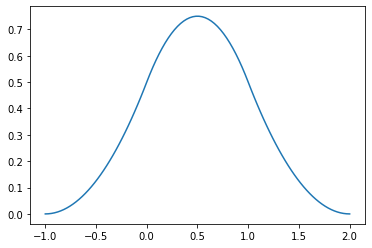

In [2]:
d = 3
sf = ScalingFunction(d)
sf.plot()

In [3]:
l1_norm = quad(sf, sf.l1, sf.l2)[0]
print("L1 norm =", l1_norm)
assert np.isclose(l1_norm, 1.)

l2_norm = np.sqrt(quad(lambda x: sf(x)**2, sf.l1, sf.l2)[0])
print("L2 norm =", l2_norm)

L1 norm = 0.9999999999999994
L2 norm = 0.7416198485712339


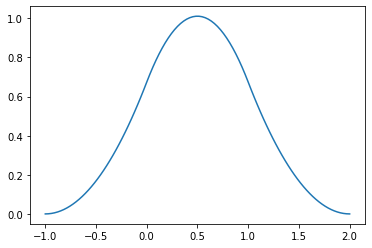

In [4]:
# L2 normalization
sf.plot(scale=1./l2_norm)

- Urban - 2009, Fig. 5.7

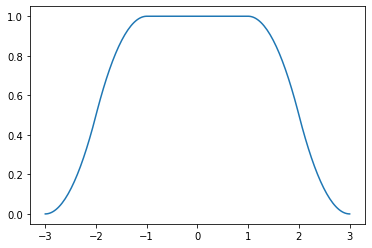

In [5]:
# partition of unity
nx = 200
x = np.linspace(-d, d, nx)
s = np.zeros(nx)
for k in range(sf.l1, sf.l2 + 1):
    s += sf(x + k)
plt.plot(x, s)
plt.show()
assert np.isclose(s[nx//2], 1.)

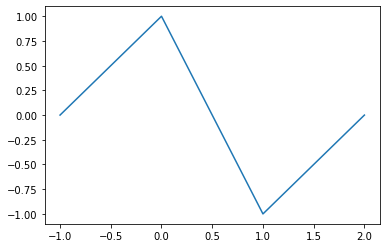

H1 norm = 1.244989959716471


In [6]:
# first order derivative
sf.plot(nu=1)

sf_deriv = sf.derivative()
h1_norm = np.sqrt(quad(lambda x: sf_deriv(x)**2, sf.l1, sf.l2)[0] + l2_norm**2)
print("H1 norm =", h1_norm)

In [7]:
a = sf.refinement_coeffs()
sum_a = a.sum()
print("refinement coefficients =", a)
print("sum =", sum_a)
assert np.isclose(sum_a, 2.)

refinement coefficients = [0.25 0.75 0.75 0.25]
sum = 2.0


In [8]:
g = ScalingFunction(3).gramian()
g_ref = np.array([1/120, 13/60, 11/20, 13/60, 1/120])
assert np.all(np.isclose(g, g_ref))

l2_norm_g = np.sqrt(g[d-1])
print("L2 norm from gramian =", l2_norm_g)
print("L2 norm from quadrature =", l2_norm)
assert np.isclose(l2_norm_g, l2_norm)

L2 norm from gramian = 0.7416198487095664
L2 norm from quadrature = 0.7416198485712339


- Primbs - 2008: For $d = 3$, $g = [1/120, 13/60, 11/20, 13/60, 1/120]$

In [9]:
h = sf.inner_product(nu=1)
h_ref = np.array([-32/3, -64/3, 64, -64/3, -32/3]) / 2**6
assert np.all(np.isclose(h, h_ref))

h1_norm_h = np.sqrt(h[d-1] + g[d-1])
print("H1 norm from inner product =", h1_norm_h)
print("H1 norm from quadrature =", h1_norm)
assert np.isclose(h1_norm_h, h1_norm)

H1 norm from inner product = 1.2449899597988736
H1 norm from quadrature = 1.244989959716471


- Primbs - 2006, Beispiel: For $d = 3$ and $j = 3$, $h = [-32/3, -64/3, 64, -64/3, -32/3]$